In [2]:
#Data Loading
import pandas as pd
users_data = pd.read_csv("C:/Users/LENOVO/Downloads/USER_TAKEHOME.csv")


In [3]:
#Extracting basic stats for Users 
print(users_data.head())
print(users_data.info())
print(users_data.describe(include='all'))

                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3 

In [4]:
#Checking unique gender values
unique_values_gender = users_data['GENDER'].unique()
print(unique_values_gender)

['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


# There are 8 unique gender categories. I have created a gender mapping so that they fall under those 8 accounting for case conversions and redundant values


In [5]:
#there are 8 unique gender categories. I have created a gender mapping so that they fall under those 8 accounting for case conversions and redundant values

gender_mapping = {
    "non_binary": "non-binary",
    "Non-Binary": "non-binary",
    "Prefer not to say": "prefer_not_to_say",
    "my gender isn't listed": "not_listed",
    "not_specified": "not_listed"
}

users_data['GENDER'] = users_data['GENDER'].str.lower().replace(gender_mapping)
print("Cleaned 'GENDER' values:", users_data['GENDER'].unique())


Cleaned 'GENDER' values: ['female' nan 'male' 'non-binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'unknown' 'prefer not to say']


# Calculating the percentage of missing values in each column


In [6]:
# Calculating the percentage of missing values in each column

missing_values_count = users_data.isnull().sum()

missing_values_percentage = (users_data.isnull().sum() / len(users_data)) * 100

# Display the results
print("Missing Values Count:\n", missing_values_count)
print("\nMissing Values Percentage:\n", missing_values_percentage)

Missing Values Count:
 ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Missing Values Percentage:
 ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           5.892
dtype: float64


# Checking if a particular birth_date appears more often or is a place holder. 1970-01-01 00:00:00+00:00 appears to be a place holder

In [7]:
#Checking if a particular birth_date appears more often or is a place holder

users_data['BIRTH_DATE'] = pd.to_datetime(users_data['BIRTH_DATE'], errors='coerce', utc=True)

birth_date_counts = users_data['BIRTH_DATE'].value_counts()
print(birth_date_counts.head())

users_data['CREATED_DATE'] = pd.to_datetime(users_data['CREATED_DATE'], errors='coerce', utc=True)

created_date_counts = users_data['CREATED_DATE'].value_counts()
print(created_date_counts.head())


1970-01-01 00:00:00+00:00    1272
1979-12-11 08:00:00+00:00      63
2000-12-12 00:00:00+00:00      28
2000-12-31 00:00:00+00:00      23
2001-01-01 00:00:00+00:00      16
Name: BIRTH_DATE, dtype: int64
2023-01-12 18:30:15+00:00    2
2019-08-28 02:21:44+00:00    2
2024-04-11 02:56:41+00:00    2
2024-03-11 17:03:02+00:00    2
2024-02-25 20:43:59+00:00    2
Name: CREATED_DATE, dtype: int64


# Calculating age

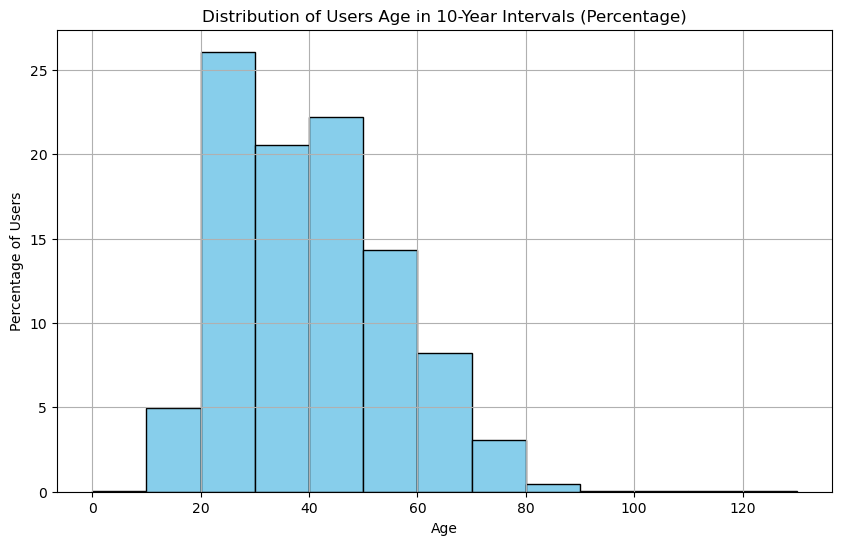

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

users_data['BIRTH_DATE'] = pd.to_datetime(users_data['BIRTH_DATE'], errors='coerce')
users_data['year'] = users_data['BIRTH_DATE'].dt.year  # Extracting the year
users_data['month'] = users_data['BIRTH_DATE'].dt.month  # Extracting the month

current_year = pd.Timestamp('now').year
users_data['age'] = current_year - users_data['BIRTH_DATE'].dt.year

plt.figure(figsize=(10, 6))

weights = (np.ones_like(users_data['age'].dropna()) / len(users_data['age'].dropna())) * 100

max_age = users_data['age'].max()
bins = np.arange(0, max_age + 10, 10)  # This creates bins from 0 up to maximum age with steps of 10

plt.hist(users_data['age'].dropna(), bins=bins, weights=weights, color='skyblue', edgecolor='black')
plt.title('Distribution of Users Age in 10-Year Intervals (Percentage)')
plt.xlabel('Age')
plt.ylabel('Percentage of Users')
plt.grid(True)
plt.show()


# Calculating the percentage of users over 100 years old


In [87]:
# Calculating the percentage of users over 100 years old

current_year = pd.Timestamp('now').year
users_data['age'] = current_year - users_data['BIRTH_DATE'].dt.year

percentage_over_100 = (users_data[users_data['age'] > 100].shape[0] / users_data.shape[0]) * 100
print(f"Percentage of users over 100 years old: {percentage_over_100:.2f}%")

Percentage of users over 100 years old: 0.06%


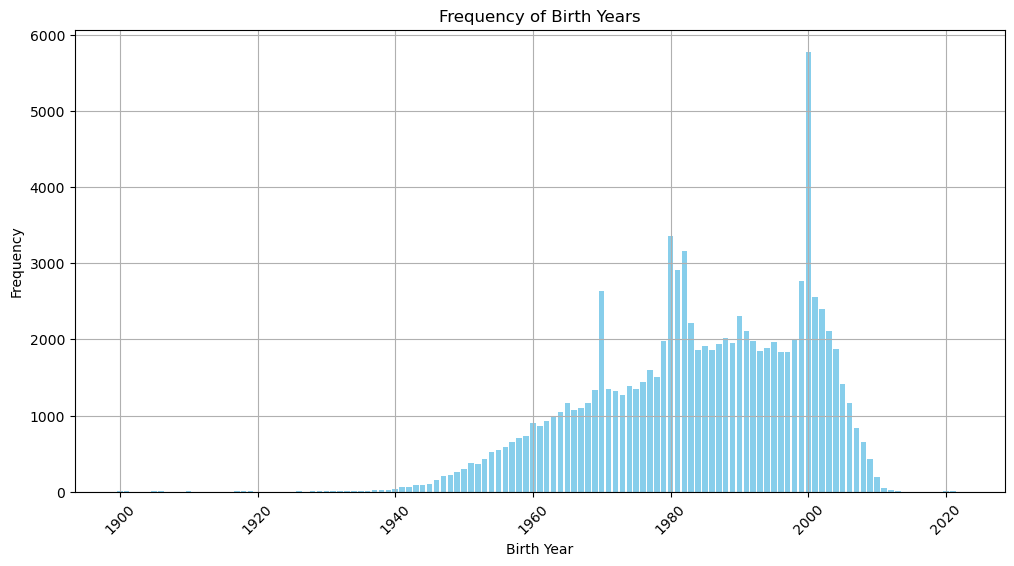

In [14]:
#Visualizing which year has the highest number of users born -- year 2000 and 1980 has the highest values so checking for potential data issues below
import matplotlib.pyplot as plt

users_data['BIRTH_YEAR'] = users_data['BIRTH_DATE'].dt.year
year_counts = users_data['BIRTH_YEAR'].value_counts().sort_index()  

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Frequency of Birth Years')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

# Checking for year 2000 and 1980 whether there is a potential place holder or data issue - but data seems to be evenly distributed across all months


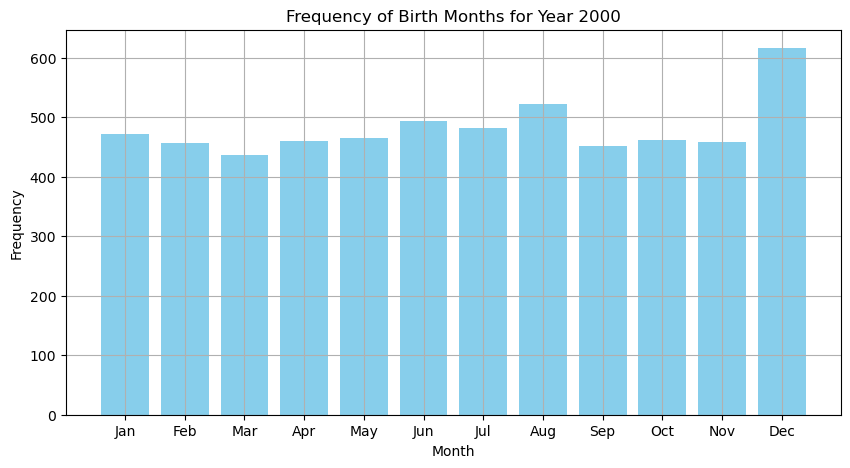

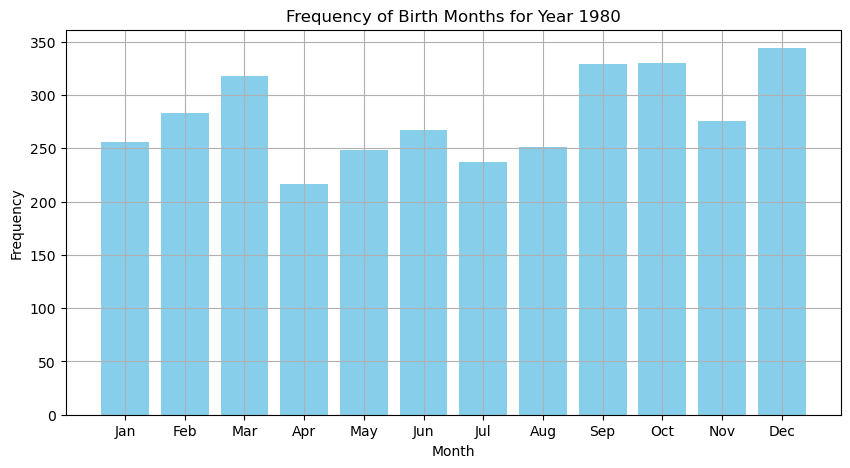

In [88]:
# Checking for year 2000 and 1980 whether there is a potential place holder or data issue - but data seems to be evenly distributed across all months

year_2000_data = users_data[users_data['BIRTH_DATE'].dt.year == 2000]
month_counts = year_2000_data['BIRTH_DATE'].dt.month.value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Birth Months for Year 2000')
plt.xticks(month_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



year_1980_data = users_data[users_data['BIRTH_DATE'].dt.year == 1980]

# Extracting the month and count the frequencies
month_counts = year_1980_data['BIRTH_DATE'].dt.month.value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(month_counts.index, month_counts.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Birth Months for Year 1980')
plt.xticks(month_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plotting the percentage distribution of gender


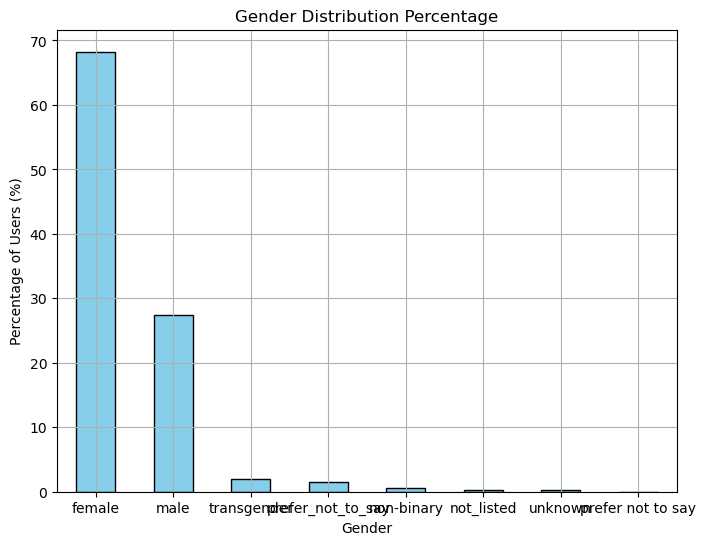

In [92]:
# Plotting the percentage distribution of gender

gender_counts = users_data['GENDER'].value_counts(normalize=True) * 100  # normalize=True gives the proportion

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender Distribution Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=0) 
plt.grid(True)
plt.show()

Data Quality Issues
Missing Values:

The language column shows a substantial missing data rate at 30%, which is significant enough to potentially skew any language-based analysis.

The gender column has approximately 5.89% missing entries, and the state column has around 4.8% missing data. These gaps could impact demographic and regional analyses. 

Gender Column:
The gender column includes 11 distinct values with some redundancies, such as "my gender isn't listed" and "not listed" being separate categories despite their similar meanings. I addressed this by mapping these to fewer categories, reducing them to 8 distinct ones for more straightforward interpretation.

Placeholder Values:
In the birth date column, about 1.272% of records use 1970-01-01 as a birth date. This value likely serves as a default or placeholder, indicating incomplete data collection for some users.